In [8]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model



In [9]:
model = load_model("mobilenet_augmented.keras")


2025-07-30 14:11:33.293568: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory( 
    "food_6", 
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(180, 180),
    batch_size=16,
    label_mode="categorical"
)

class_names = val_ds.class_names

custom_class_names = ['Dairy', 'Sugar', 'Protein', 'Mixed']  #I prefer classifying them this way




Found 464 files belonging to 4 classes.
Using 92 files for validation.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


2025-07-30 14:12:12.865391: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


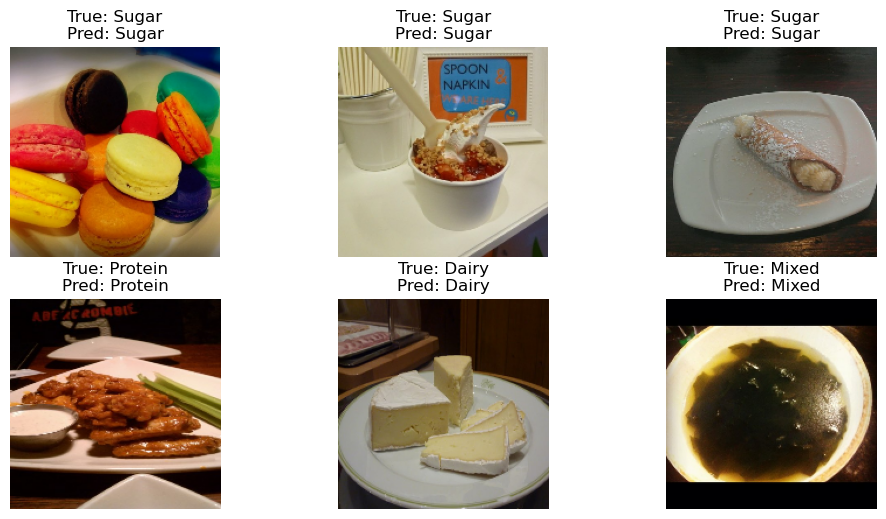

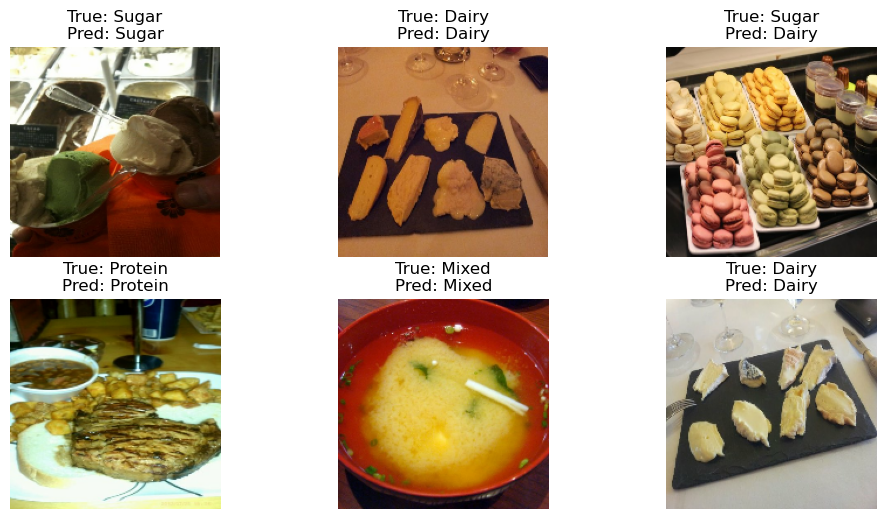

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Getting a batch from the validation set
for images, labels in val_ds.take(2):
    preds = model.predict(images)
    
    plt.figure(figsize=(12, 6))
    for i in range(6):  # Shows first 6 predictions
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = custom_class_names[np.argmax(labels[i])]
        pred_label = custom_class_names[np.argmax(preds[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis("off")